<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thanks for taking the time to improve the project! It is now accepted. Good luck on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but unfortunately there are some problems that need to be fixed before the project is accepted. Let me know if you have questions!

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/datasets/car_data.csv')
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected

</div>

In [3]:
#lowercase all columns 
df.columns = df.columns.str.lower()
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [4]:
#dropping unneccesary columns
df=df.drop(['lastseen','postalcode','numberofpictures','postalcode','registrationmonth','datecreated','datecrawled'], axis=1)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense to drop those columns, as they don't seem to be related to car price

</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   price             354369 non-null  int64 
 1   vehicletype       316879 non-null  object
 2   registrationyear  354369 non-null  int64 
 3   gearbox           334536 non-null  object
 4   power             354369 non-null  int64 
 5   model             334664 non-null  object
 6   mileage           354369 non-null  int64 
 7   fueltype          321474 non-null  object
 8   brand             354369 non-null  object
 9   notrepaired       283215 non-null  object
dtypes: int64(4), object(6)
memory usage: 27.0+ MB


In [6]:
#checking missing values
df.isna().sum()

#replacing NaNs/missing values with unknown
df[['vehicletype','gearbox','model','fueltype','notrepaired']] = df[['vehicletype','gearbox','model','fueltype','notrepaired']].fillna('unkown')

#checking to see if there is still missing values 
print(df.isna().sum())

price               0
vehicletype         0
registrationyear    0
gearbox             0
power               0
model               0
mileage             0
fueltype            0
brand               0
notrepaired         0
dtype: int64


<div class="alert alert-success">
<b>Reviewer's comment</b>

Missing values were dealt with reasonably

</div>

In [7]:
df.head()

,price,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
0,480,unkown,1993,manual,0,golf,150000,petrol,volkswagen,unkown
1,18300,coupe,2011,manual,190,unkown,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unkown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


In [8]:
categorical_features = ['vehicletype', 'gearbox', 'model','fueltype','brand','notrepaired']

In [28]:
df_ohe = pd.get_dummies(df)
print(df_ohe.shape)
df_ohe.head()

(354369, 318)


,price,registrationyear,power,mileage,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,...,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_no,notrepaired_unkown,notrepaired_yes
0,480,1993,0,150000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,18300,2011,190,125000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75,150000,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,3600,2008,69,90000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


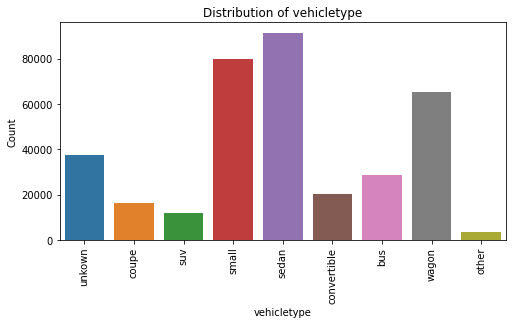

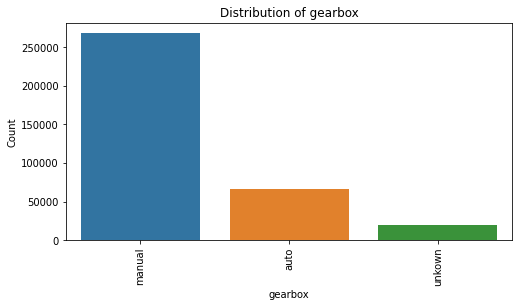

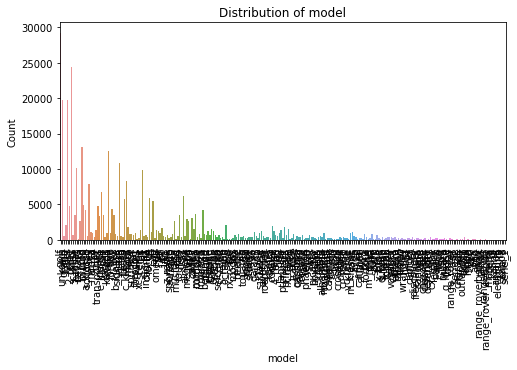

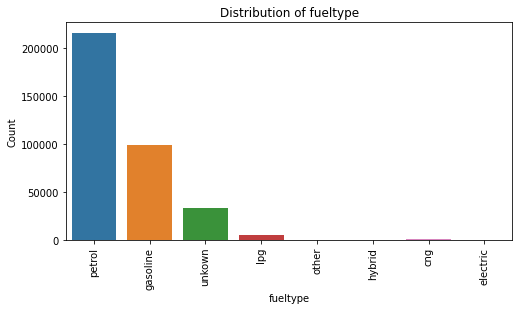

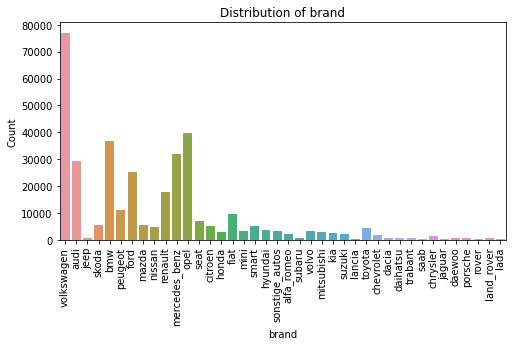

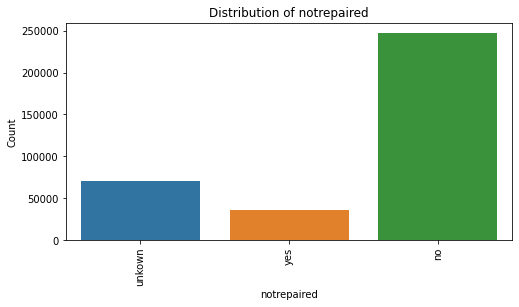

In [33]:
import seaborn as sns

for feature in categorical_features: 
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Categorical features were encoded. Not sure why you dropped both brand and model though: while one-hot encoding the model would produce probably too many columns, the brand is fairly low-cardinality :)
    
You also seem to have missed some other problems with the data apart from missing values. I suggest looking at the distributions of numerical features.

</div>

In [10]:
from sklearn.model_selection import train_test_split

#defining target and features
features = df.drop(['price'], axis=1)
target = df['price']

features_ohe = df_ohe.drop(['price'], axis=1)
target_ohe = df_ohe['price']


#splitting the dataset:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=12345)
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size=0.2, random_state=12345)

features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features_ohe, target_ohe, test_size=0.2, random_state=12345)
features_train_ohe, features_val_ohe, target_train_ohe, target_val_ohe = train_test_split(features_train_ohe, target_train_ohe, test_size=0.2, random_state=12345)

In [11]:
print(features.shape)
print(target.shape)
print(features_ohe.shape)
print(target_ohe.shape)

(354369, 9)
(354369,)
(354369, 26)
(354369,)


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test sets

</div>

Data preparation is completed with replacing missing values with "unknown". Columns that do not help us with model training are removed. The df is encoded with one hot encoding to train Linear Regression, Random Forest, and Decision Tree models. Target and features are defined for each test and train datasets. They are split using the train_test_split ().

## Model training

In [12]:
from sklearn.metrics import mean_squared_error

def rmse(target, prediction): 
    rmse = mean_squared_error(target,prediction) ** 0.5
    return rmse

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Note that RMSE is one of the [default metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values) (`scoring='neg_root_mean_squared_error'`)

</div>

In [23]:
%%time
#performing linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lnr = LinearRegression()
lnr_cv = cross_val_score(lnr, features_train_ohe, target_train_ohe, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE scores:", -lnr_cv)
print("Average RMSE score:", -lnr_cv.mean())

Cross-validated RMSE scores: [3456.64330651 3519.99866912 3493.58276968 3497.93013936 3520.24889604]
Average RMSE score: 3497.6807561425776
CPU times: user 1.41 s, sys: 946 ms, total: 2.35 s
Wall time: 2.34 s


In [35]:
%%time
#performing Random Forest model 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [10,50,10]}
rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, param_grid = param, cv = 5, scoring = 'neg_root_mean_squared_error')
rf_grid.fit(features_train_ohe, target_train_ohe)
best_params = rf_grid.best_params_
best_grid = rf_grid.best_estimator_
predicted_values = best_grid.predict(features_val_ohe)
print("RMSE for encoded data: ", rmse(target_val_ohe, predicted_values))
print("Best parametes:", best_params )

RMSE for encoded data:  1946.8892811696746
Best parametes: {'n_estimators': 50}
CPU times: user 4min 18s, sys: 1.86 s, total: 4min 19s
Wall time: 4min 20s


In [37]:
%%time
#performing Decision Tree model

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param = {'max_depth': [10,50,10]}

dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, param_grid = param, cv=5, scoring = 'neg_root_mean_squared_error')
dt_grid.fit(features_train_ohe, target_train_ohe)
best_params = dt_grid.best_params_
best_grid_dt = dt_grid.best_estimator_
predicted_values_dt = best_grid_dt.predict(features_val_ohe)
print("RMSE for encoded data: ", rmse(target_val_ohe, predicted_values_dt))
print("Best parametes:", best_params )

RMSE for encoded data:  2141.2094699396225
Best parametes: {'max_depth': 10}
CPU times: user 11.3 s, sys: 0 ns, total: 11.3 s
Wall time: 11.4 s


In [38]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [40]:
%%time

#performing CatBoost Model 
from catboost import CatBoostRegressor

param = {
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [4, 6, 8],
    'iterations': [100]
}

cat = CatBoostRegressor(cat_features=categorical_features, random_state=12345)
cat_grid = GridSearchCV(cat, param_grid=param, scoring='neg_root_mean_squared_error', cv=5,
    verbose=1)
cat_grid.fit(features_train, target_train)
best_params = cat_grid.best_params_
best_estimator_cat = cat_grid.best_estimator_
predicted_values_cat = best_estimator_cat.predict(features_val)
print("RMSE for encode data: ", rmse(target_val, predicted_values_cat))
print("Best parametes:", best_params )

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0:	learn: 4276.0987531	total: 182ms	remaining: 18s
1:	learn: 4060.4362340	total: 312ms	remaining: 15.3s
2:	learn: 3858.8759376	total: 429ms	remaining: 13.9s
3:	learn: 3687.8338070	total: 544ms	remaining: 13.1s
4:	learn: 3536.8064537	total: 658ms	remaining: 12.5s
5:	learn: 3410.3479446	total: 779ms	remaining: 12.2s
6:	learn: 3288.7166604	total: 901ms	remaining: 12s
7:	learn: 3187.1332375	total: 1.01s	remaining: 11.7s
8:	learn: 3094.9767057	total: 1.13s	remaining: 11.4s
9:	learn: 3000.8892957	total: 1.24s	remaining: 11.2s
10:	learn: 2926.3783502	total: 1.35s	remaining: 10.9s
11:	learn: 2865.1381715	total: 1.47s	remaining: 10.8s
12:	learn: 2811.5480744	total: 1.59s	remaining: 10.6s
13:	learn: 2757.4587063	total: 1.7s	remaining: 10.4s
14:	learn: 2701.1693570	total: 1.81s	remaining: 10.3s
15:	learn: 2659.5191621	total: 1.92s	remaining: 10.1s
16:	learn: 2617.3894349	total: 2.03s	remaining: 9.9s
17:	learn: 2582.8239653	total: 2.14s	r

In [41]:
%%time

#performing LightGBM model 
import lightgbm as lgb

param = {
    'boosting': 'gbdt',
    'max_depth': 10,
    'n_estimators': 100,
    'learning_rate': 0.05,
    'num_leaves': 50,
    'objective': 'regression'
}

lgb_reg = lgb.LGBMRegressor(**param)
lgb_cv = cross_val_score(lgb_reg, features_train_ohe, target_train_ohe, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE scores:", -lgb_cv)
print("Average RMSE score:", -lgb_cv.mean())

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Cross-validated RMSE scores: [2003.72627107 2048.64894667 2027.95466457 2051.33252253 2040.38037096]
Average RMSE score: 2034.4085551604592
CPU times: user 24 s, sys: 162 ms, total: 24.2 s
Wall time: 24.5 s


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. Using the test set to tune hyperparameters is not appropriate due to biasing the test set score. Please use cross-validation to tune hyperparamers. (strictly speaking, it would be better to use cross-validation to compare different model types as well, and only use the test set to evaluate one final selected model)
2. Another point is that `%time` is a line magic: it measures the time it takes to run the line it is located on (doing nothing in our case, as there is no other code on the line). If you replace it with a cell magic `%%time` it will measure the time it takes to run the *cell*, but note that it has to be on the first line of the cell to work.
    
    Other possible approach would be to use [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) which returns training and prediction time in each fold as part of its output.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Both problems were fixed!

</div>

## Model analysis

In [42]:
data = {'Model':['Linear Regression', 'Random Forest', 'Decision Tree', 'CatBooster', 'LightGBM'],
        'CPU Time (secs)': [2.35, 259.00, 11.35, 792.00, 24.20],
        'Wall Time (secs)': [2.34, 260.00, 11.40, 804.00, 24.50],
        'RMSE': [3497.68, 1946.88, 2141.20, 1852.71, 2034.40]}
DF = pd.DataFrame(data)
DF

,Model,CPU Time (secs),Wall Time (secs),RMSE
0,Linear Regression,2.35,2.34,3497.68
1,Random Forest,259.00,260.00,1946.88
2,Decision Tree,11.35,11.40,2141.20
3,CatBooster,792.00,804.00,1852.71
4,LightGBM,24.20,24.50,2034.40


In conclusion, CatBooster model has the lowest and best RMSE at max_depth:8, iterations:100, and learning rate:0.1, but it has the highest running time. Linear Regression has the highest RMSE at 3497.68 with a low running time of 2 secs. In term of the fastest prediction, Linear Regeression has the fastest CPU and Wall times but the highest RMSE.  With the different adjusments and models, it seems like CatBooster model perform the best overall in terms of predictive accuracy. Then follows by Random Forest, LightGBM, Decision Tree, and Linear Regression, respectively. From the observed data, it looks like the small the RMSE score, the longer the running time. 

In [52]:
%%time

#performing CatBoost Model 
from catboost import CatBoostRegressor

param = {
    'learning_rate': 0.1,
    'depth': 8,
    'iterations': 100
}

cat = CatBoostRegressor(cat_features=categorical_features, **param, random_state=12345)
cat.fit(features_train, target_train)
predicted_values_cat = cat.predict(features_test)
print("RMSE for encode data: ", rmse(target_test, predicted_values_cat))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 4217.2087169	total: 287ms	remaining: 28.5s
1:	learn: 3959.9913299	total: 599ms	remaining: 29.4s
2:	learn: 3732.8619699	total: 871ms	remaining: 28.2s
3:	learn: 3529.2763720	total: 1.14s	remaining: 27.3s
4:	learn: 3347.3908736	total: 1.42s	remaining: 27s
5:	learn: 3191.7808529	total: 1.69s	remaining: 26.4s
6:	learn: 3059.0729145	total: 1.97s	remaining: 26.1s
7:	learn: 2941.1332723	total: 2.24s	remaining: 25.8s
8:	learn: 2838.1940483	total: 2.52s	remaining: 25.4s
9:	learn: 2750.1413045	total: 2.78s	remaining: 25s
10:	learn: 2672.3886518	total: 3.06s	remaining: 24.7s
11:	learn: 2596.1915002	total: 3.33s	remaining: 24.5s
12:	learn: 2522.9547284	total: 3.6s	remaining: 24.1s
13:	learn: 2462.2398303	total: 3.87s	remaining: 23.8s
14:	learn: 2409.3647804	total: 4.14s	remaining: 23.5s
15:	learn: 2365.5894165	total: 4.42s	remaining: 23.2s
16:	learn: 2325.2282409	total: 4.68s	remaining: 22.9s
17:	learn: 2292.1356023	total: 4.98s	remaining: 22.7s
18:	learn: 2262.7645181	total: 5.26s	remain

In [48]:
%%time
#performing Random Forest model 

rf = RandomForestRegressor(n_estimators= 50, random_state=12345)
rf.fit(features_train_ohe, target_train_ohe)
predicted_values = rf.predict(features_test_ohe)
print("RMSE for encoded data: ", rmse(target_test_ohe, predicted_values))

RMSE for encoded data:  1984.5640072269628
CPU times: user 38.9 s, sys: 116 ms, total: 39 s
Wall time: 39.1 s


I tested my test data with Random Forest and CatBooster. In this case, CatBoost results in a lower CPU and Wall times, and RMSE; which is expected from the training dataset. This concludes that CatBoost is the best model to use in this case with the lowest RMSE and running time of ~27 secs which is not too long. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please check the results after fixing the problems above.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

It would be interesting to separately measure training and prediction time of the tuned models (as hyperparameter tuning time mostly depends on the number of hyperparameter combinations you're willing to consider)

</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed